In [ ]:
!pip install yfinance yahoo_fin

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.3/81.3 kB 1.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.9/82.9 kB 4.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.8/143.8 kB 7.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 9.5 MB/s eta 0:00:00
  Created wheel for sgmllib3k: filename=sgmllib3k-1.0.0-py3-none-any.whl size=6049 sha256=a3dbb56ea37b12d184397e5fd392302f05098dc94618e0c383efbcc110415656
  Stored in directory: /root/.cache/pip/wheels/f0/69/93/a47e9d621be168e9e33c7ce60524393c0b92ae83cf6c6e89c5
Successfully built sgmllib3k
  Attempting uninstall: urllib3
    Found existing installation: urllib3 2.0.7
    Uninstalling urllib3-2.0.7:
      Successfully uninstalled urllib3-2.0.7


In [ ]:
!pip install pandas quandl numpy scikit-learn matplotlib



In [ ]:
import pandas as pd
import quandl,datetime
import math
import numpy as np
from sklearn import preprocessing, svm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import yfinance as yf
import matplotlib.pyplot as plt
from matplotlib import style

In [ ]:
style.use('ggplot')

In [ ]:

#top stock market code for reference
stock_market_code = pd.read_csv("https://raw.githubusercontent.com/yashsahu27420/dataset/main/top%2010%20us%20stock%20with%20stock%20code.csv")
stock_market_code


,Rank,Company Name,Stock Symbol,Market Cap (USD Billion)
0,1,Apple Inc.,AAPL,2.75
1,2,Microsoft Corporation,MSFT,2.42
2,3,Amazon.com Inc.,AMZN,1.02
3,4,Alphabet Inc.,GOOGL,1.01
4,5,Berkshire Hathaway Inc.,BRK.A,706.00
5,6,Meta Platforms Inc.,META,425.00
6,7,UnitedHealth Group Incorporated,UNH,418.00
7,8,NVIDIA Corporation,NVDA,393.00
8,9,Tesla Inc.,TSLA,383.00
9,10,Johnson & Johnson,JNJ,372.00


In [ ]:
# Function to get technical indicators data  of stock/
def get_technical_indicators(stock_symbol, start_date, end_date):
    technical_indicators = yf.Ticker(stock_symbol).history(start=start_date, end=end_date)
    return technical_indicators

# Input stock symbol
stock_symbol = input("Stock Symbol: ")

# Input start and end dates
start_date = "2023-04-01"
end_date = "2024-04-01"

# Get technical indicators
df = get_technical_indicators(stock_symbol, start_date, end_date)


Stock Symbol: amzn


In [ ]:
df = df.dropna()
df

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2023-04-03 00:00:00-04:00,102.300003,103.290001,101.430000,102.410004,41135700,0.0,0.0
2023-04-04 00:00:00-04:00,102.750000,104.199997,102.110001,103.949997,48662500,0.0,0.0
2023-04-05 00:00:00-04:00,103.910004,103.910004,100.750000,101.099998,45175400,0.0,0.0
2023-04-06 00:00:00-04:00,100.750000,102.379997,99.800003,102.059998,43808000,0.0,0.0
2023-04-10 00:00:00-04:00,100.959999,102.199997,99.570000,102.169998,37261200,0.0,0.0
...,...,...,...,...,...,...,...
2024-03-22 00:00:00-04:00,177.750000,179.259995,176.750000,178.869995,27964100,0.0,0.0
2024-03-25 00:00:00-04:00,178.009995,180.990005,177.240005,179.710007,29815500,0.0,0.0
2024-03-26 00:00:00-04:00,180.149994,180.449997,177.949997,178.300003,29659000,0.0,0.0


In [ ]:
df['High_Low_per'] = (df['High'] - df['Close']) / df['Close']*100

In [ ]:
df['Per_change'] = (df['Open'] - df['Open']) / df['Close']*100

In [ ]:
df = df[['Close','High_Low_per','Per_change','Volume']]

In [ ]:
#df

In [ ]:
label_col = 'Close'

In [ ]:
forecast_ceil = int(math.ceil(0.001*len(df)))
#math.ceil rounds to the top

In [ ]:
df['label'] = df[label_col].shift(-forecast_ceil)

<ipython-input-93-faebf4879c7a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['label'] = df[label_col].shift(-forecast_ceil)


In [ ]:
#df.dropna(inplace=True)
#print(df.head())

In [ ]:
#feaures X, labels Y
X = np.array(df.drop(['label'],1))
X = preprocessing.scale(X)
X = X[:-forecast_ceil:]
X_lately = X[-forecast_ceil:] #no y value

<ipython-input-95-c4b2e42f9279>:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = np.array(df.drop(['label'],1))


In [ ]:
#X_lately

In [ ]:
df.dropna(inplace=True)

<ipython-input-97-c64f9f573c18>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(inplace=True)


In [ ]:
#X = X[:-forecast_out+1]#all the points
y = np.array(df['label'])

In [ ]:
len(X)

248

In [ ]:
len(y)

248

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
clf = svm.SVR(kernel='rbf') #svm.SVR()

In [ ]:
#clf = LinearRegression(n_jobs =-1) to run as many jobs as possible for fast

In [ ]:
clf.fit(X_train, y_train) #train

SVR()

In [ ]:
accuracy = clf.score(X_test, y_test) #test Accuracy squared error for linreg

In [ ]:
print(accuracy) #directionally accurate

0.7364430839296958


In [ ]:
forecast_set = clf.predict(X_lately) #pass a single value or array

In [ ]:
forecast_out = 30
print(forecast_set, accuracy) # stockprices next 30 days

[158.68411803] 0.7364430839296958


In [ ]:
df['Forecast'] = np.nan

<ipython-input-109-e44ce3a9a7b0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Forecast'] = np.nan


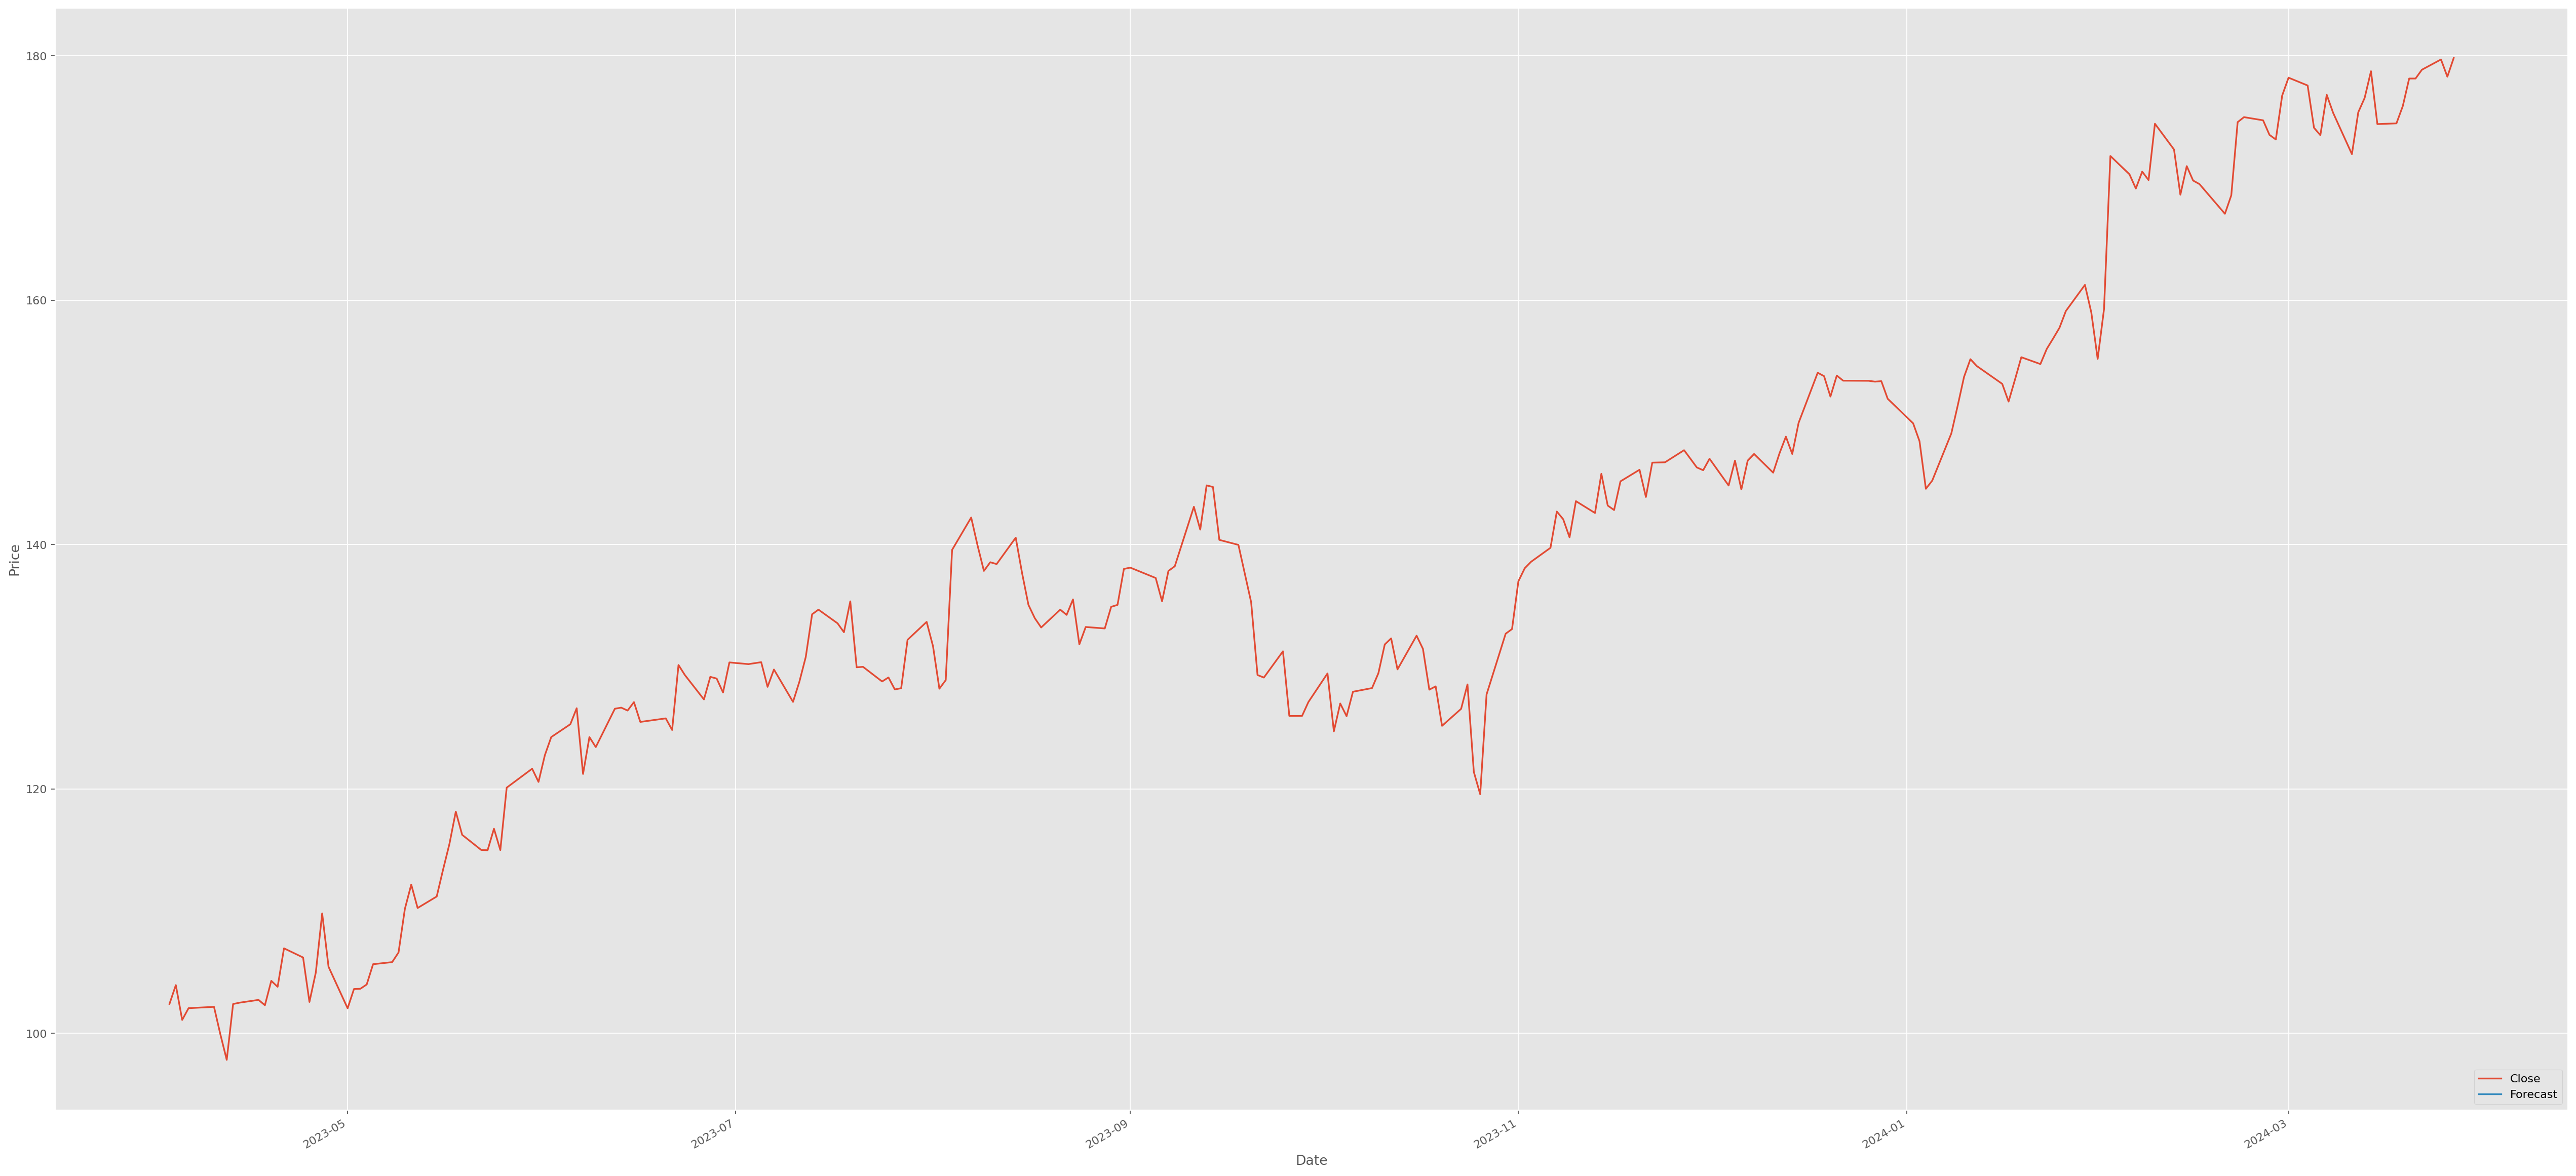

In [ ]:
from matplotlib.pyplot import figure
figure(num=None, figsize=(40, 20), dpi=160, facecolor='w', edgecolor='k')
df['Close'].plot()
df['Forecast'].plot()
plt.legend(loc=4)
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()